# Multiple Linear Regression

## Importing Packages

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
%matplotlib inline

## Data

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


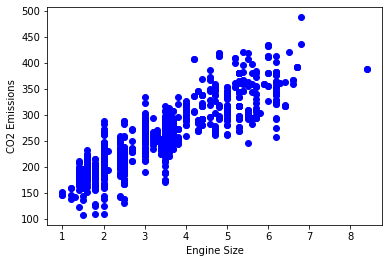

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Creating train and test dataset

In [28]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

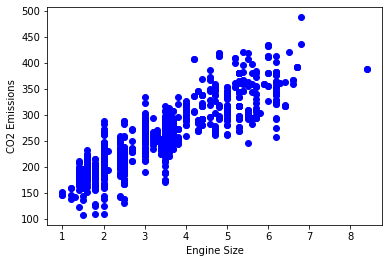

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

## Model

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[10.63569566  7.66137311  9.45475581]]
Intercept:  [66.08375652]


### Predict

In [13]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 551.14
Variance score: 0.87


/home/akmal/Documents/Learning/ROBOTIIK/Workshop 02 ML/IBM-ML0101EN-ML-Python/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Practice

In [24]:
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

print(regr.coef_)

[[10.73202631  7.07269026  6.67303119  2.32851585]]


In [29]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_act = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y_act) ** 2))
print("Variance score: %.2f" % regr.score(x, y_act))

Residual sum of squares: 699.22
Variance score: 0.83


/home/akmal/Documents/Learning/ROBOTIIK/Workshop 02 ML/IBM-ML0101EN-ML-Python/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
regr.coef_

array([[10.73202631,  7.07269026,  6.67303119,  2.32851585]])